In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
inpDir = r"C:\Users\DominiqueFournier\Dropbox\Projects\Kevitsa\Kevitsa\Data\Kevitsa_data\Kevitsa_data\Petrophysics"

In [3]:
# Lithology
lit = pd.read_csv(inpDir + "\\lith_dh.Kevitsa_20141209.csv")

# Density
den = pd.read_csv(inpDir + "\\density_core.Kevitsa_20141209.csv")

# Susceptibility
sus = pd.read_csv(inpDir + "\\magsus_core.Kevitsa_20141209.csv")

In [4]:
# Create a dictionary for all rock types
denDict = {}
for litho in pd.unique(lit.LITHOLOGY):
    denDict[litho] = []

susDict = {}
for litho in pd.unique(lit.LITHOLOGY):
    susDict[litho] = []

In [5]:
# nRow = lit.shape[0]
# progressIndex = 0
# for ii in range(nRow):

#     if lit['DH_Hole'][ii] != "KV124":
#         holeInd = sus.DH_Hole.str.match(lit['DH_Hole'][ii]) 
#         if np.any(holeInd ):
#             # Depths on the whole
#             temp = np.asarray(sus[['DH_Depth', 'Reading']][holeInd])

#             ind = np.all([lit['DH_From'][ii] < temp[:, 0], lit['DH_To'][ii] > temp[:, 0]], axis=0)

#             if np.any(ind):
#                 susDict[lit['LITHOLOGY'][ii]] += [temp[ind, 1]/1000]

#     arg = np.floor(ii/nRow*1000.)
#     if arg > progressIndex:

#         print("Done " + str(arg/10.) + " %")
#         progressIndex = arg
        
# for key in list(susDict.keys()):
    
#     if len(susDict[key])!=0:
#         susDict[key] = np.hstack(susDict[key]) 
        

# import pickle

# with open("RockCode_Susc_Core.pickle", 'wb') as handle:
#     pickle.dump(susDict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [6]:
# with open("RockCode_Density_Core.pickle", 'rb') as handle:
#     denDictCore = pickle.load(handle)

# with open("RockCode_Density.pickle", 'rb') as handle:
#     denDictDH = pickle.load(handle)

# for key in list(denDict.keys()):
    
#     if len(denDictCore[key]) > 0:
           
#         denDict[key] += [np.ravel(denDictCore[key])]
#     if len(denDictDH[key]) > 0:
           
#         denDict[key] += [np.ravel(denDictDH[key])]
        
#     denDict[key] = np.r_[denDict[key]]
with open("RockCode_Density_Core.pickle", 'rb') as handle:
    denDict = pickle.load(handle)

with open("RockCode_Susc_Core.pickle", 'rb') as handle:
    susDict = pickle.load(handle)

In [7]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib.patches as patches



In [8]:
# for key in susDict.keys():
    
keys = list(susDict.keys()) 

        
for key in sorted(keys):
    if (len(susDict[key]) > 0) :
        print(key, len(susDict[key]))


AOO 45
BXH 2
BXHC 4
BXO 7
IDB 35
IDI 71
IFO 8
IGB 3040
IGBC 269
IGBM 385
IGBO 572
IGP 36
IMO 14
IPG 98
MAB 79
MAM 61
MHF 17
MPE 35887
MPH 703
MPHB 359
MQZ 8
MSCBK 1134
MSCF 23
MSCM 167
MSCSD 1
NOR 262
OVB 599
RST 6
SOO 1670
UDU 3570
UKO 264
UOO 114
UPE 528
UPX 2039
UPXO 76727
UWB 2226
UWBO 25888
UWBOP 2315
VAN 6
VBA 25
VMO 17
VOO 2065
VTU 35
VTUI 545
VTUM 557
ZDAM 5
ZDF 17
ZDGBO 804
ZDM 204
ZDPG 28
ZMY 38
ZRO 86
ZVAC 2
ZVAM 4
ZVC 22
ZVCL 2
ZVDC 8
ZVO 783
ZVPG 6
ZVQ 46
ZVQCS 6
ZVQF 20
ZVRO 173
ZVSU 25
ZXE 992


In [9]:
cpool = {     
        'VAN':np.r_[0, 200, 0]/255,
         'VOO':np.r_[0, 200, 0]/255,
         'VIO':np.r_[0, 200, 0]/255,
    'VTUI':np.r_[0, 200, 0]/255,
         'MVO':np.r_[0, 120, 0]/255,
        'VMO':np.r_[0, 120, 0]/255,
    'VTUM':np.r_[0, 120, 0]/255,
    'VTU':np.r_[0, 120, 0]/255,
    'VBA':np.r_[0, 120, 0]/255,
        'VFO':np.r_[178, 255, 104]/255,
         'SAK':np.r_[255, 174, 0]/255,
         'SAN':np.r_[255, 225, 140]/255,
         'MSCBK':np.r_[110, 190, 255]/255,
         'MPHB':np.r_[110, 190, 255]/255,
         'MSC':np.r_[110, 190, 255]/255,
         'MPH':np.r_[110, 190, 255]/255,
         'MHF':np.r_[100, 180, 255]/255,
    'MQZ':np.r_[139, 241, 255]/255,
    'SOO':np.r_[139, 241, 255]/255,
             'MSCSD':np.r_[139, 241, 255]/255,
             'MAM':np.r_[139, 241, 255]/255,
             'MAB':np.r_[139, 241, 255]/255,
    'MSO':np.r_[139, 241, 255]/255,
             'BXH':np.r_[208, 140, 212]/255,
         'BXHC':np.r_[208, 140, 212]/255,
         'BXO':np.r_[208, 140, 212]/255,  
             'UKO':np.r_[176, 245, 184]/255,
             'UDU':np.r_[255, 255, 255]/255,
         'USP':np.r_[255, 255, 255]/255,
         'UPE':np.r_[255, 255, 255]/255,
         'UPX':np.r_[140, 140, 140]/255,
         'UPXO':np.r_[140, 140, 140]/255,
    'UOO':np.r_[140, 140, 140]/255,
    'MPE':np.r_[140, 140, 140]/255,
    'UWB':np.r_[140, 140, 140]/255,
        'IDB':np.r_[200, 200, 200]/255,
             'IMO':np.r_[200, 200, 200]/255,
             'IGB':np.r_[200, 200, 200]/255,
            'IDI':np.r_[200, 200, 200]/255,
         'IGP':np.r_[210, 210, 210]/255,
         'IPG':np.r_[210, 210, 210]/255,
         'IGBM':np.r_[230, 230, 230]/255,
    'OVB':np.r_[255, 255, 0]/255,
    'Z':np.r_[255, 0, 255]/255,
}
def groupDict(dictio, rockCode):   
    """
        Lump lithologies
        
    """
    
    groupDictio = {}
    for litho in list(rockCode.keys()):
        groupDictio[litho] = []
        
    for key in list(dictio.keys()):
        if 'OVB' == key:
            groupDictio['OVB'] += [dictio[key]]
   
        if ('IG' in key) and (key != 'IGBM'):
            groupDictio['IGB'] += [dictio[key]]
        if 'IGP' in key:
            groupDictio['IGP'] += [dictio[key]]
        if 'IPG' in key:
            groupDictio['IPG'] += [dictio[key]]
        if 'IGBM' in key:
            groupDictio['IGBM'] += [dictio[key]]
            
        if 'IDI' in key:
            groupDictio['IDI'] += [dictio[key]]
        if 'IMO' in key:
            groupDictio['IMO'] += [dictio[key]]
                        
        if 'IDB' in key:
            groupDictio['IDB'] += [dictio[key]]

        if ('VTU' == key):
            groupDictio['VTU'] += [dictio[key]]
        if 'VTUM' == key:
            groupDictio['VTUM'] += [dictio[key]]
            
        if 'VTUI' == key:
            groupDictio['VTUI'] += [dictio[key]]
            
        if ('MVO' in key):
            groupDictio['MVO'] += [dictio[key]]
        if 'VOO' in key:
            groupDictio['VOO'] += [dictio[key]]         
        if 'VFO' in key:
            groupDictio['VFO'] += [dictio[key]]

            
        if ('MSCBK' == key):
            groupDictio['MSCBK'] += [dictio[key]]
            
 
        if ('MPHB' in key):
            groupDictio['MPHB'] += [dictio[key]]

        if ('MAM' in key):
            groupDictio['MAM'] += [dictio[key]]   

        if ("MSO" in key):
            groupDictio['MSO'] += [dictio[key]]

        if ("MPH" == key) and ('MPHB' != key):
            groupDictio['MPH'] += [dictio[key]]
        if ("MHF" == key):
            groupDictio['MHF'] += [dictio[key]]
            
        if ("MQZ" == key):
            groupDictio['MQZ'] += [dictio[key]]    
        if ('MAB' in key):
            groupDictio['MAB'] += [dictio[key]]   
        if ("SOO" in key):
            groupDictio['SOO'] += [dictio[key]]
        if ('MSCSD' == key):
            groupDictio['MSCSD'] += [dictio[key]]
           
        if ('UPE' in key) :
            groupDictio['UPE'] += [dictio[key]]
        if ("UDU" in key):
            groupDictio['UDU'] += [dictio[key]]
            
        if ("USP" in key):
            groupDictio['USP'] += [dictio[key]]
        if 'BXH' == key:
            groupDictio['BXH'] += [dictio[key]]
        if 'BXO' == key:
            groupDictio['BXO'] += [dictio[key]]
        if 'BXHC' == key:
            groupDictio['BXHC'] += [dictio[key]]               
        if ('MPE' in key):
            groupDictio['MPE'] += [dictio[key]]
            
        if ('UPX' in key) and ("UPXO" != key):
            groupDictio['UPX'] += [dictio[key]]
            
        if ("UWB" in key):
            groupDictio['UWB'] += [dictio[key]]
            
        if ("UPXO" in key):
            groupDictio['UPXO'] += [dictio[key]]
        if ("UOO" in key):
            groupDictio['UOO'] += [dictio[key]]

        if ('SAK' in key):
            groupDictio['SAK'] += [dictio[key]]

        if ('SAN' in key):
            groupDictio['SAN'] += [dictio[key]]

    #     if key == "UPX":
    #         groupDictio['UPX'] += [dictio[key]]

        if ('UKO' in key) :
            groupDictio['UKO'] += [dictio[key]]

        if 'VBA' in key:
            groupDictio['VBA'] += [dictio[key]]            
        if 'VMO' in key:
            groupDictio['VMO'] += [dictio[key]]
        if 'VAN' in key:
            groupDictio['VAN'] += [dictio[key]]

    for key in list(groupDictio.keys()):

        if len(groupDictio[key])!=0:
#             print(key, groupDictio[key])
            
            groupDictio[key] = np.r_[groupDictio[key]]
            
    return groupDictio



In [10]:
groupDenDict = groupDict(denDict, cpool)
groupSusDict = groupDict(susDict, cpool)

In [11]:
np.nonzero(groupDenDict[key])





KeyError: 'ZXE'

In [40]:
np.hstack(groupDenDict[key])



array([], dtype=float64)

In [43]:
val

array([array([0.0003 , 0.0004 , 0.0014 , ..., 0.00103, 0.00143, 0.00222]),
       array([0.00128, 0.0014 , 0.00643, ..., 0.0095 , 0.0296 , 0.0793 ]),
       array([0.01545, 0.00182, 0.00122, ..., 0.291  , 0.249  , 0.119  ])],
      dtype=object)

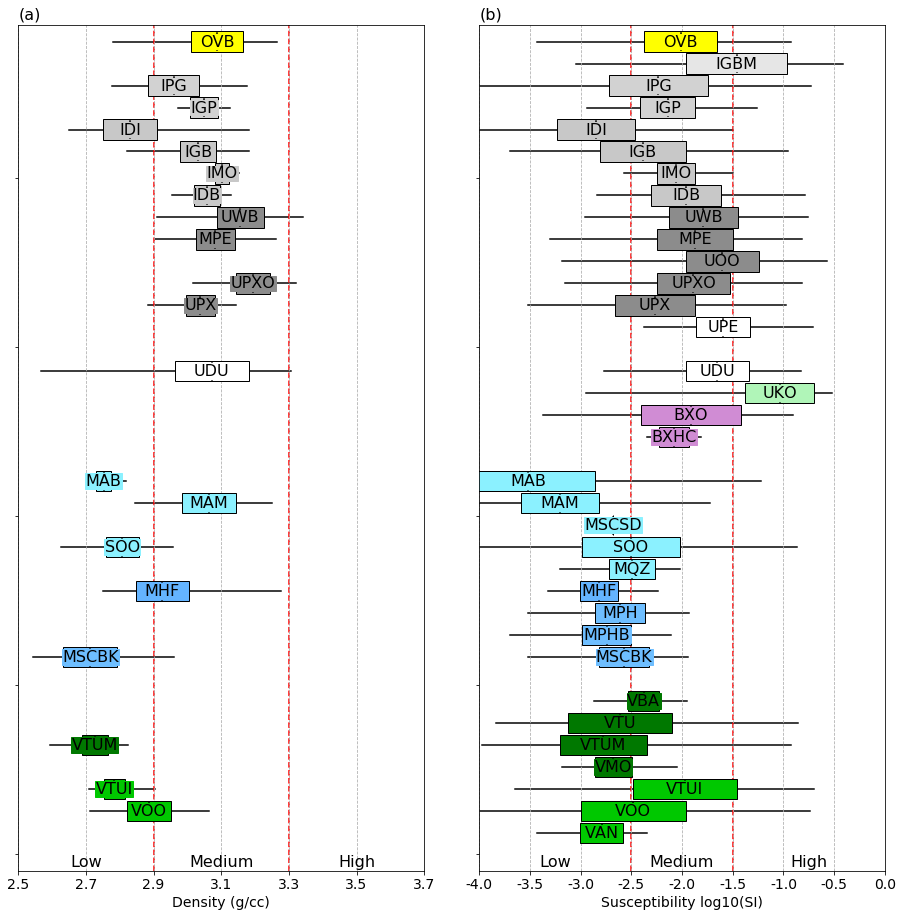

In [44]:
ii = 0.
jj= -0.06
   
fig = plt.figure(figsize=(16,16))

ax1 = plt.subplot(1,2,1)
for ii, key in enumerate(list(groupSusDict.keys())):
    if (len(groupSusDict[key]) > 0):
        jj += 1.3
    if (key in list(groupDenDict.keys())) and (len(groupDenDict[key]) > 0):
        val = np.hstack(groupDenDict[key])
        
        if len(val) == 0:
            continue
        mean = np.mean(val)

        std = np.std(val)
        minVal = np.percentile(val, 5)
        maxVal = np.percentile(val, 95)

        # for label in units:   
        
    #     if jj > 0.9:
    #         ii += 0.2
    #         jj=0.05

        plt.plot([minVal,maxVal], [jj]*2, 'k', zorder=0)
        plt.plot([mean]*2, [jj-0.5, jj+0.5], 'k')

        pp = ax1.add_patch(
            patches.Rectangle([mean-std/2,0+jj-0.6], std, 1.2, facecolor=cpool[key], edgecolor='k')) #
        
        ax1.text(mean,0+jj, key, ha='center',va='center', fontsize = 16,zorder = 6, color = 'k',bbox={'facecolor':cpool[key],'pad':0.3,'edgecolor':cpool[key], 'alpha':1.})
#     ax1.text(mean,0+jj+0.0175,key, va='center', ha='center', size=14 )
labels = np.linspace(2.5,3.7,7)

plt.plot([2.9]*2, [-1,jj+1], 'r--', zorder=0)
plt.plot([3.3]*2, [-1,jj+1], 'r--', zorder=0)
plt.text(2.7, -.5, 'Low', ha='center', va='center', size=16)
plt.text(3.1, -.5, 'Medium', ha='center', va='center', size=16)
plt.text(3.5, -.5, 'High', ha='center', va='center', size=16)

ax1.set_xlim(2.5, 3.6)
ax1.set_ylim(-1, jj+1)
ax1.set_xlabel('Density (g/cc)', size=14)
ax1.grid(True, axis='x', linestyle='--')
ax1.set_axisbelow(True) 
ax1.set_title("(a)",  loc='left', size=16)
ax1.set_xticks(labels)
ax1.set_xticklabels(["%.1f" % ii for ii in labels.tolist()], size=14)
ax1.set_yticklabels([])
ax1.set_aspect(1/20)
pos = ax1.get_position()

jj= -0.06
ax2 = plt.subplot(1,2,2)
ax2.set_position([pos.x0+.4, pos.y0, pos.width, pos.height])
for ii, key in enumerate(list(groupSusDict.keys())):

    if (len(groupSusDict[key]) > 0):
        jj += 1.3
        val = np.hstack(groupSusDict[key])
        val = val[~np.isnan(val)]
        val = np.log10(val[val>0])
        
        if len(val) > 0: 
            mean = np.mean(val)

            std = np.std(val)
            minVal = np.percentile(val, 5)
            maxVal = np.percentile(val, 95)

            # for label in units:   
            
        #     if jj > 0.9:
        #         ii += 0.2
        #         jj=0.05

            plt.plot([minVal,maxVal], [jj]*2, 'k', zorder=0)
            plt.plot([mean]*2, [jj-0.5, jj+0.5], 'k')
            pp = ax2.add_patch(
                patches.Rectangle([mean-std/2,0+jj-0.6], std, 1.2, facecolor=cpool[key], edgecolor='k')) #

            ax2.text(mean,0+jj, key, ha='center',va='center', fontsize = 16,zorder = 6, color = 'k',bbox={'facecolor':cpool[key],'pad':0.3,'edgecolor':cpool[key], 'alpha':1.})
#     ax2.text(mean,0+jj+0.0175,key, va='center', ha='center', size=14 )
labels = np.linspace(-4,0,9)
plt.plot([-2.5]*2, [-1,jj+1], 'r--', zorder=0)
plt.plot([-1.5]*2, [-1,jj+1], 'r--', zorder=0)
plt.text(-3.25, -.5, 'Low', ha='center', va='center', size=16)
plt.text(-2, -.5, 'Medium', ha='center', va='center', size=16)
plt.text(-0.75, -.5, 'High', ha='center', va='center', size=16)
ax2.set_xlim(-4, -.5)
ax2.set_ylim(-1, jj+1)
ax2.set_xlabel('Susceptibility log10(SI)', size=14)
ax2.grid(True, axis='x', linestyle='--')
ax2.set_axisbelow(True) 
ax2.set_title("(b)",  loc='left', size=16)
ax2.set_xticks(labels)
ax2.set_xticklabels(["%.1f" % ii for ii in labels.tolist()], size=14)
ax2.set_yticklabels([])
# ax2.set_aspect(1/20)
plt.show()

fig.savefig("Kevitsa_PhysProp_BarPlot.png", bbox_inches='tight', dpi=300)



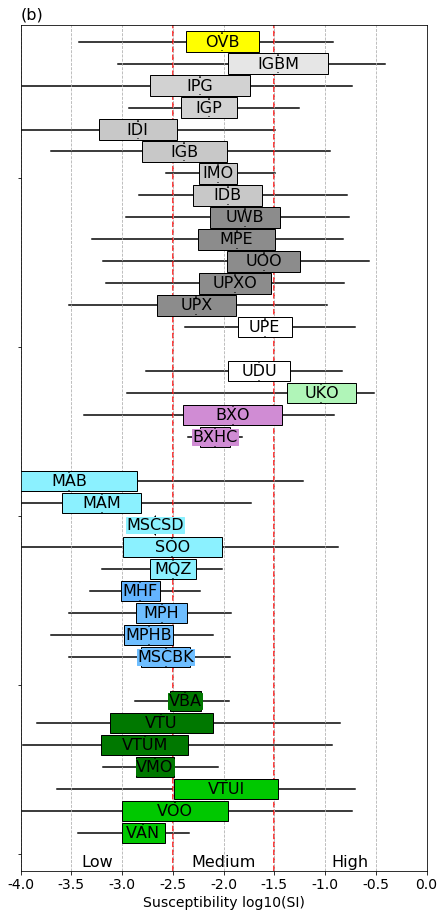

In [45]:
ii = 0.
jj= -0.06
   
fig = plt.figure(figsize=(16,16))

# ax1 = plt.subplot(1,2,1)
# for ii, key in enumerate(list(groupSusDict.keys())):
#     if (len(groupSusDict[key]) > 0):
#         jj += 1.3
#     if (key in list(groupDenDict.keys())) and (len(groupDenDict[key]) > 0):
#         val = np.hstack(groupDenDict[key])
        
#         if len(val) == 0:
#             continue
#         mean = np.mean(val)

#         std = np.std(val)
#         minVal = np.percentile(val, 5)
#         maxVal = np.percentile(val, 95)

#         # for label in units:   
        
#     #     if jj > 0.9:
#     #         ii += 0.2
#     #         jj=0.05

#         plt.plot([minVal,maxVal], [jj]*2, 'k', zorder=0)
#         plt.plot([mean]*2, [jj-0.5, jj+0.5], 'k')

#         pp = ax1.add_patch(
#             patches.Rectangle([mean-std/2,0+jj-0.6], std, 1.2, facecolor=cpool[key], edgecolor='k')) #
        
#         ax1.text(mean,0+jj, key, ha='center',va='center', fontsize = 16,zorder = 6, color = 'k',bbox={'facecolor':cpool[key],'pad':0.3,'edgecolor':cpool[key], 'alpha':1.})
# #     ax1.text(mean,0+jj+0.0175,key, va='center', ha='center', size=14 )
# labels = np.linspace(2.5,3.7,7)

# plt.plot([2.9]*2, [-1,jj+1], 'r--', zorder=0)
# plt.plot([3.3]*2, [-1,jj+1], 'r--', zorder=0)
# plt.text(2.7, -.5, 'Low', ha='center', va='center', size=16)
# plt.text(3.1, -.5, 'Medium', ha='center', va='center', size=16)
# plt.text(3.5, -.5, 'High', ha='center', va='center', size=16)

# ax1.set_xlim(2.5, 3.6)
# ax1.set_ylim(-1, jj+1)
# ax1.set_xlabel('Density (g/cc)', size=14)
# ax1.grid(True, axis='x', linestyle='--')
# ax1.set_axisbelow(True) 
# ax1.set_title("(a)",  loc='left', size=16)
# ax1.set_xticks(labels)
# ax1.set_xticklabels(["%.1f" % ii for ii in labels.tolist()], size=14)
# ax1.set_yticklabels([])
# ax1.set_aspect(1/20)
# pos = ax1.get_position()

jj= -0.06
ax2 = plt.subplot()
ax2.set_position([pos.x0+.4, pos.y0, pos.width, pos.height])
for ii, key in enumerate(list(groupSusDict.keys())):

    if (len(groupSusDict[key]) > 0):
        jj += 1.3
        val = np.hstack(groupSusDict[key])
        val = val[~np.isnan(val)]
        val = np.log10(val[val>0])
        
        if len(val) > 0: 
            mean = np.mean(val)

            std = np.std(val)
            minVal = np.percentile(val, 5)
            maxVal = np.percentile(val, 95)

            # for label in units:   
            
        #     if jj > 0.9:
        #         ii += 0.2
        #         jj=0.05

            plt.plot([minVal,maxVal], [jj]*2, 'k', zorder=0)
            plt.plot([mean]*2, [jj-0.5, jj+0.5], 'k')
            pp = ax2.add_patch(
                patches.Rectangle([mean-std/2,0+jj-0.6], std, 1.2, facecolor=cpool[key], edgecolor='k')) #

            ax2.text(mean,0+jj, key, ha='center',va='center', fontsize = 16,zorder = 6, color = 'k',bbox={'facecolor':cpool[key],'pad':0.3,'edgecolor':cpool[key], 'alpha':1.})
#     ax2.text(mean,0+jj+0.0175,key, va='center', ha='center', size=14 )
labels = np.linspace(-4,0,9)
plt.plot([-2.5]*2, [-1,jj+1], 'r--', zorder=0)
plt.plot([-1.5]*2, [-1,jj+1], 'r--', zorder=0)
plt.text(-3.25, -.5, 'Low', ha='center', va='center', size=16)
plt.text(-2, -.5, 'Medium', ha='center', va='center', size=16)
plt.text(-0.75, -.5, 'High', ha='center', va='center', size=16)
ax2.set_xlim(-4, -.5)
ax2.set_ylim(-1, jj+1)
ax2.set_xlabel('Susceptibility log10(SI)', size=14)
ax2.grid(True, axis='x', linestyle='--')
ax2.set_axisbelow(True) 
ax2.set_title("(b)",  loc='left', size=16)
ax2.set_xticks(labels)
ax2.set_xticklabels(["%.1f" % ii for ii in labels.tolist()], size=14)
ax2.set_yticklabels([])
# ax2.set_aspect(1/20)
plt.show()

fig.savefig("Kevitsa_Susc_BarPlot.png", bbox_inches='tight', dpi=300)

In [30]:
susDict.keys(), susDict['UDU']



(dict_keys(['OVB', 'MPE', 'IGB', 'MGB', 'UPXO', 'MAB', 'MHF', 'IGBU', 'IGBO', 'MAM', 'ZVO', 'ZVSU', 'ZVQ', 'SOO', 'VOO', 'UDU', 'NOR', 'ZDM', 'UWB', 'IDI', 'RST', 'UWBO', 'ZMY', 'ZRO', 'ZXE', 'IPG', 'ZVRO', 'ZDGBO', 'UWBOP', 'IGBC', 'UOO', 'ZVDC', 'ZVQCS', 'BXO', 'MSCSD', 'IGP', 'IFO', 'MSCBK', 'VTUM', 'VTUI', 'ZVC', 'MPHB', 'IGBM', 'MPH', 'UPX', 'ZDAM', 'VMO', 'MSCM', 'ZVF', 'UKO', 'IGR', 'VFO', 'UPE', 'MSCF', 'ZVAM', 'ZVCL', 'ZDPG', 'ZVQF', 'ZDF', 'ZVAC', 'IMO', 'ZVQC', 'IDB', 'IUO', 'ZVPG', 'OSS', 'MQZ', 'RSP', 'USP', 'UHB', 'VBA', 'AOO', 'VAN', 'VTU', 'BXHC', 'BXH', 'MSCC', 'VIO']),
 array([0.03707, 0.00815, 0.0102 , ..., 0.03872, 0.211  , 0.133  ]))

In [410]:
denDict.keys(), denDict['IGP']







(dict_keys(['OVB', 'MPE', 'IGB', 'MGB', 'UPXO', 'MAB', 'MHF', 'IGBU', 'IGBO', 'MAM', 'ZVO', 'ZVSU', 'ZVQ', 'SOO', 'VOO', 'UDU', 'NOR', 'ZDM', 'UWB', 'IDI', 'RST', 'UWBO', 'ZMY', 'ZRO', 'ZXE', 'IPG', 'ZVRO', 'ZDGBO', 'UWBOP', 'IGBC', 'UOO', 'ZVDC', 'ZVQCS', 'BXO', 'MSCSD', 'IGP', 'IFO', 'MSCBK', 'VTUM', 'VTUI', 'ZVC', 'MPHB', 'IGBM', 'MPH', 'UPX', 'ZDAM', 'VMO', 'MSCM', 'ZVF', 'UKO', 'IGR', 'VFO', 'UPE', 'MSCF', 'ZVAM', 'ZVCL', 'ZDPG', 'ZVQF', 'ZDF', 'ZVAC', 'IMO', 'ZVQC', 'IDB', 'IUO', 'ZVPG', 'OSS', 'MQZ', 'RSP', 'USP', 'UHB', 'VBA', 'AOO', 'VAN', 'VTU', 'BXHC', 'BXH', 'MSCC', 'VIO']),
 array([2.94, 2.96, 2.96, 2.95, 2.91, 2.9 , 2.87, 2.91, 2.92, 2.94, 2.95,
        2.96, 2.96, 2.98, 2.96, 2.97, 2.99, 2.96, 2.99, 2.98, 3.  , 2.97,
        2.96, 2.99, 2.94, 2.93, 2.97, 2.99, 2.98, 2.93, 2.92, 2.9 , 2.9 ,
        2.91, 2.95, 2.98, 2.99, 3.01, 2.99, 3.  , 3.04, 3.05, 3.05, 3.07,
        3.08, 3.07, 3.04, 3.05, 3.04, 3.03, 3.05, 3.12, 3.14, 3.08, 3.14,
        3.11, 3.06, 3.05, 3.04, 3.1 

In [ ]:
# Latex color code
\definecolor{BXH}{RGB}{208, 140, 212}
\definecolor{BXHC}{RGB}{218, 150, 222}
\definecolor{UDU}{RGB}{255, 255, 255}
\definecolor{IGB}{RGB}{200, 200, 200}
\definecolor{IGP}{RGB}{128, 0, 128}
\definecolor{IGBM}{RGB}{170, 170, 170}
\definecolor{UPX}{RGB}{140, 140, 140}
\definecolor{UPXO}{RGB}{140, 140, 140}
\definecolor{UKO}{RGB}{176, 245, 184}
\definecolor{VTU}{RGB}{0, 160, 18}
\definecolor{MVO}{RGB}{0, 120, 0}
\definecolor{VMO}{RGB}{0, 200, 0}
\definecolor{VFO}{RGB}{178, 255, 104}
\definecolor{SAK}{RGB}{255, 174, 0}
\definecolor{SAN}{RGB}{255, 225, 140}
\definecolor{MSC}{RGB}{150, 140, 140}
\definecolor{MPHB}{RGB}{110, 190, 255}
\definecolor{MPH}{RGB}{139, 241, 255}